In [17]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))


AttributeError: `np.complex_` was removed in the NumPy 2.0 release. Use `np.complex128` instead.

In [4]:
import numpy as np
import sys
import os

sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../..'))
import signalConditioning
import visualization

import visualization


In [7]:
#We load in the Raw EEG Signals
path = "../../Data"
files = os.listdir(path)

raw_signals = []
labels = [] 

for file in files:
    
    
    if file == "Labels":
        continue
     
    raw_signals.append(np.load(f"{path}/{file}"))    


labels_path = path + "/Labels"
print(labels_path)
print(os.listdir(labels_path))

for file in os.listdir(labels_path):
    print(file)
    labels.append(np.load(f"{labels_path}/{file}",allow_pickle=True))

../../Data/Labels
['sub-9_ses-0.npy', 'sub-4_ses-3.npy', 'sub-2_ses-12.npy', 'sub-2_ses-4.npy', 'sub-11_ses-14.npy', 'sub-2_ses-5.npy', 'sub-2_ses-13.npy', 'sub-4_ses-2.npy', 'sub-9_ses-1.npy', 'sub-9_ses-3.npy', 'sub-4_ses-0.npy', 'sub-2_ses-11.npy', 'sub-7_ses-8.npy', 'sub-2_ses-7.npy', 'sub-7_ses-14.npy', 'sub-2_ses-6.npy', 'sub-7_ses-9.npy', 'sub-2_ses-10.npy', 'sub-4_ses-1.npy', 'sub-9_ses-2.npy', 'sub-9_ses-6.npy', 'sub-4_ses-5.npy', 'sub-2_ses-14.npy', 'sub-2_ses-2.npy', 'sub-11_ses-13.npy', 'sub-7_ses-11.npy', 'sub-7_ses-10.npy', 'sub-11_ses-12.npy', 'sub-2_ses-3.npy', 'sub-4_ses-4.npy', 'sub-9_ses-7.npy', 'sub-9_ses-5.npy', 'sub-4_ses-6.npy', 'sub-11_ses-8.npy', 'sub-2_ses-1.npy', 'sub-1_ses-9.npy', 'sub-11_ses-10.npy', 'sub-7_ses-12.npy', 'sub-7_ses-13.npy', 'sub-11_ses-11.npy', 'sub-1_ses-8.npy', 'sub-2_ses-0.npy', 'sub-11_ses-9.npy', 'sub-4_ses-7.npy', 'sub-9_ses-4.npy', 'sub-3_ses-4.npy', 'sub-8_ses-0.npy', 'sub-5_ses-3.npy', 'sub-8_ses-14.npy', 'sub-3_ses-20.npy', 'sub-5_

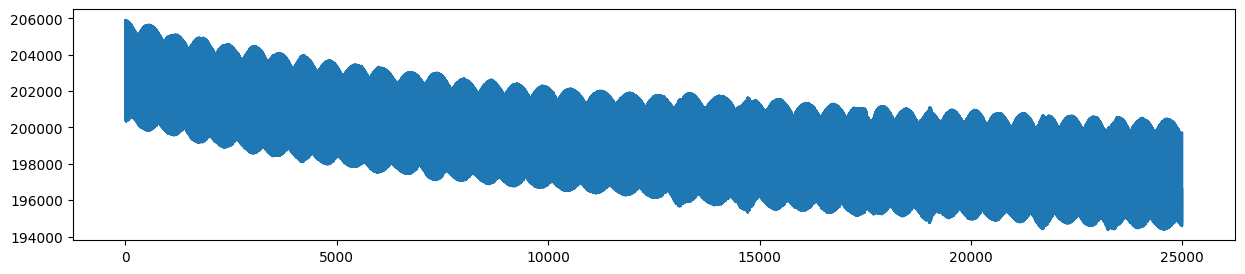

In [13]:
visualization.plotEEG(raw_signals[0][0][5000:30000],(15,3))


##### **We will now start with the cleaning process of the signals, starting by applying a passband filter to remove unwanted frequencies** #####

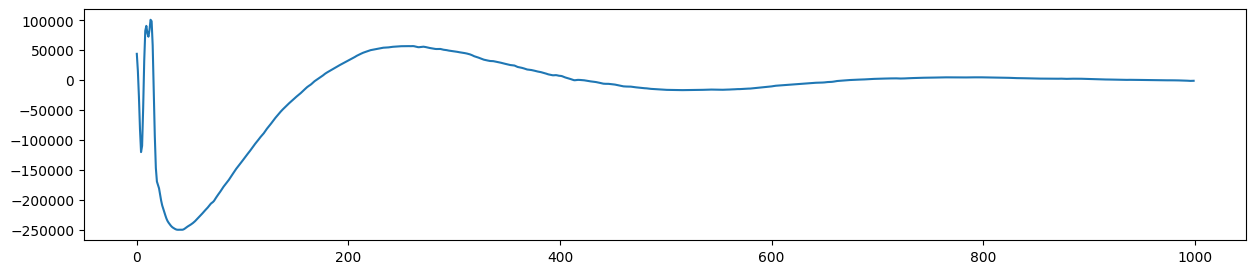

In [17]:
#Since the bandpass function only filters one EEG signal, we will loop through all out EEG Signals, and filter them accordingly

#We will iterate each of our signals, and apply the filters for each one 

data = [signalConditioning.bandPassFilter(x,fs=250) for x in raw_signals]

visualization.plotEEG(data[0][0][0:1000],(15,3))

##### **Now that we've applied the bandpass filter we will now apply a notch filter to remove the interferences from the electricity** #####

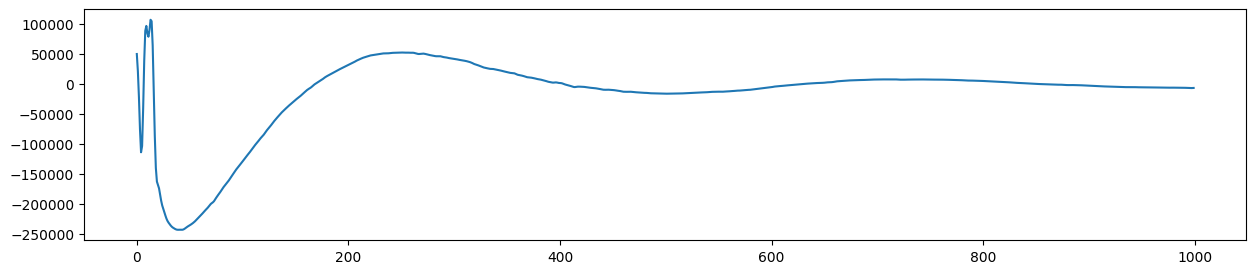

In [19]:
data = [signalConditioning.notchFilter(x,250) for x in data]
visualization.plotEEG(data[0][0][0:1000],(15,3))

##### **Now we will apply mean referencing to remove the common noise in between each of the channels** ######

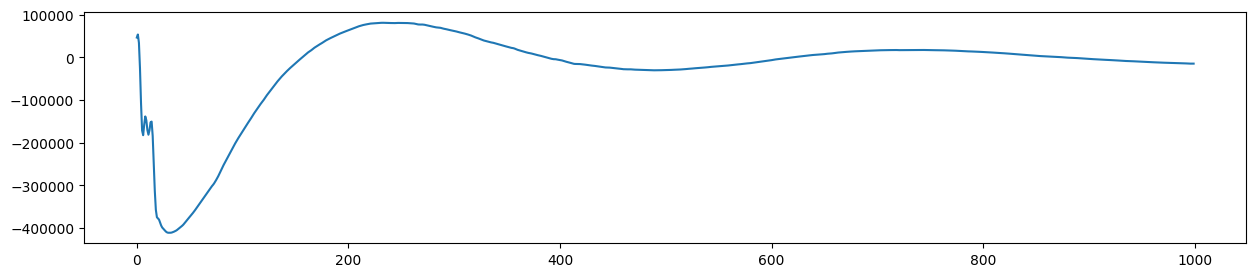

In [23]:
data = [signalConditioning.mean_referencing(x) for x in data]

visualization.plotEEG(data[0][0][0:1000],(15,3))

##### **We will now scale the signal so that the time series can be comparable** ####

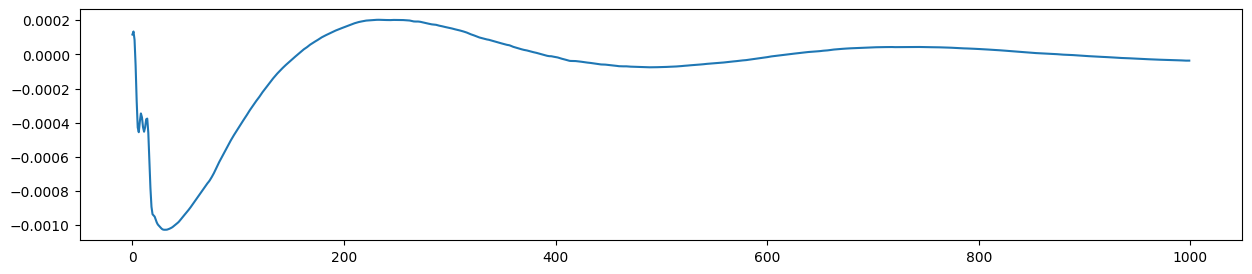

In [26]:
data = [signalConditioning.scale_signal(x) for x in data]

visualization.plotEEG(data[0][0][0:1000],(15,3))

#### **Now we will normalize the signal so that the models and more complex methods can learn better** ####

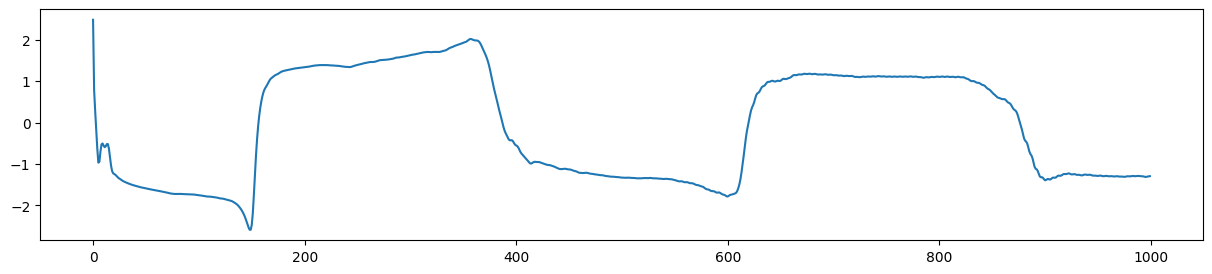

In [27]:
data = [signalConditioning.normalize(x) for x in data]

visualization.plotEEG(data[0][0][0:1000],(15,3))

In [ ]:
type(raw_signals)
type(labels)

NameError: name 'tyep' is not defined